# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from src.modules.feature_engineering import scale_encoder, num_null_replacement, print_null_features, get_ord_digit
from src.modules.load_source_data import load_data_set, load_agg_data
from src.modules.models import randforest_reg, regmodel_evaluation, ensemble_feature_importance, xgboost_reg

pd.set_option("display.max_columns", None)

In [2]:
train = pd.read_csv('data/Training/combined_datasets/train.csv')
y = pd.read_csv('data/Training/combined_datasets/target.csv')

print("Train shape: ", train.shape)
print("Target shape: ",y.shape)

Train shape:  (1092525, 83)
Target shape:  (1092525, 1)


In [3]:
train = pd.concat([train, y], axis=1)
train.shape

(1092525, 84)

In [4]:
y.describe()

,arr_delay
count,1.092525e+06
mean,5.513769e+00
std,4.998149e+01
min,-2.330000e+02
25%,-1.500000e+01
50%,-6.000000e+00
75%,8.000000e+00
max,1.866000e+03


In [5]:
print(f"Train data set columns: {len(train.columns)} and rows {len(train.index)}.")
train.head()

Train data set columns: 84 and rows 1092525.


,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure,arr_delay
0,WN,6253,N8553W,6253,14122,PIT,13204,MCO,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,Partly cloudy,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,Sunny,1018.0,-6.0
1,WN,6279,N444WN,6279,14321,PWM,10821,BWI,535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,Light drizzle,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,Partly cloudy,1018.0,0.0
2,WN,1798,N7839A,1798,14492,RDU,10693,BNA,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,Sunny,1020.0,1.0
3,WN,1058,N457WN,1058,14492,RDU,11292,DEN,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,Patchy rain possible,1020.0,-8.0
4,WN,5745,N916WN,5745,14570,RNO,12889,LAS,2135,2245,70.0,345,

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
origin_avg_temp,64282,0.058838
origin_pressure,64282,0.058838
origin_min_temp,64282,0.058838
origin_max_temp,64282,0.058838
origin_total_snow_cm,64282,0.058838
origin_windspeed_kmph,64282,0.058838
origin_precipitation_mm,64282,0.058838
origin_humidity,64282,0.058838
origin_visibility,64282,0.058838
origin_cloud_cover,64282,0.058838


In [7]:
train = train[(train['dest_pressure'].notna()) & (train['origin_pressure'].notna())].reset_index(drop=True)
#train = train[train['origin_wind_chill_c'].notna()].reset_index(drop=True)
train.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure,arr_delay
0,WN,6253,N8553W,6253,14122,PIT,13204,MCO,1610,1825,135.0,834,2018,9,28,5,39,16,18,-4.856410,109.010256,32.157895,0.000000,0.631579,0.0,52.473684,5.028351,112.404639,14.441176,1.338235,12.985294,0.000000,39.750000,9.794393,113.028037,22.666667,0.000000,12.095238,0.000000,38.000000,16476,40367,156.688446,133.358861,78901284,62539560,153.984737,121.514593,157453740.2,4650071,3550404,17690901,14467289,11.0,21.0,17.0,0.0,6.0,0.0,76.0,10.0,22.0,16.0,16.0,9.0,16.0,Partly cloudy,1019.0,26.0,34.0,31.0,0.0,8.0,0.9,71.0,10.0,14.0,34.0,29.0,10.0,34.0,Sunny,1018.0,-6.0
1,WN,6279,N444WN,6279,14321,PWM,10821,BWI,535,710,95.0,452,2018,9,28,5,39,5,7,-0.725322,71.884120,59.761905,3.714286,5.238095,0.0,18.428571,1.393855,74.631285,37.285714,2.020408,7.959184,0.000000,21.040816,-2.178354,74.153963,54.754717,0.000000,16.113208,0.320755,6.358491,5773,34338,155.089744,138.365690,78901284,62539560,153.984737,121.514593,157453740.2,1154895,962404,12809026,10253075,12.0,17.0,14.0,0.0,9.0,1.2,77.0,8.0,54.0,13.0,13.0,14.0,13.0,Light drizzle,1019.0,15.0,24.0,21.0,0.0,9.0,2.1,76.0,10.0,36.0,20.0,19.0,11.0,19.0,Partly cloudy,1018.0,0.0
2,WN,1798,N7839A,1798,14492,RDU,10693,BNA,620,650,90.0,442,2018,9,28,5,39,6,6,-4.048485,67.618182,2.230769,0.000000,12.923077,0.0,14.769231,1.981250,71.656250,9.960784,2.705882,4.196078,0.313725,30.764706,-5.719780,72.972527,23.000000,0.000000,13.666667,0.000000,0.000000,22739,26928,155.076923,115.956185,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,7613155,6149937,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,12.0,24.0,20.0,0.0,4.0,0.0,79.0,10.0,11.0,19.0,18.0,6.0,18.0,Sunny,1020.0,1.0
3,WN,1058,N457WN,1058,14492,RDU,11292,DEN,1940,2120,220.0,1436,2018,9,28,5,39,19,21,-2.648148,195.500000,6.857143,2.428571,12.928571,0.0,19.214286,2.058824,204.663102,6.975610,1.365854,14.121951,0.000000,21.634146,8.785978,203.837638,8.296296,2.246914,11.530864,0.000000,27.580247,22739,94040,159.000000,139.984087,78901284,62539560,153.984737,121.514593,157453740.2,6023381,4603572,29507455,25361777,21.0,27.0,25.0,0.0,9.0,1.2,81.0,10.0,42.0,26.0,24.0,13.0,26.0,Light rain shower,1018.0,6.0,12.0,9.0,0.0,16.0,0.2,68.0,10.0,24.0,9.0,6.0,22.0,6.0,Patchy rain possible,1020.0,-8.0
4,WN,5745,N916WN,5745,14570,RNO,12889,LAS,2135,2245,70.0,345,

In [8]:
train.shape

(967480, 84)

In [9]:
# get sample of data
train = train.sample(frac=0.6, random_state=1).reset_index(drop=True)
train.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure,arr_delay
0,UA,1489,N456UA,1489,11618,EWR,14027,PBI,830,1142,192.0,1023,2019,12,3,2,49,8,11,15.215347,146.881188,13.022556,0.526316,15.413534,0.0,36.451128,13.318471,142.807325,13.807229,7.566265,12.849398,0.000000,47.993976,-3.568106,144.903654,11.360656,0.885246,19.131148,0.000000,12.180328,53080,10237,154.668261,137.079128,53730561,44826607,168.099691,135.674654,1.334422e+08,21627166,18134725,3896947,3175571,-1.0,3.0,1.0,0.6,21.0,5.7,75.0,7.0,42.0,1.0,-5.0,27.0,-5.0,Patchy heavy snow,1001.0,12.0,18.0,15.0,0.0,14.0,0.0,53.0,10.0,0.0,15.0,14.0,17.0,14.0,Sunny,1015.0,-40.0
1,DL,4778,N8903A,4778,11433,DTW,14696,SBN,840,946,66.0,157,2018,3,27,2,13,8,9,7.070370,33.548148,17.000000,14.551020,11.387755,0.0,33.448980,1.859539,33.054507,24.250000,15.930556,7.250000,0.000000,22.833333,-1.833034,34.071813,17.925373,11.791045,14.268657,0.000000,19.537313,60834,2440,0.000000,0.000000,74251270,63838437,140.036327,112.141329,1.710422e+08,17938380,14794034,403915,323661,5.0,10.0,8.0,0.0,18.0,10.3,89.0,6.0,96.0,8.0,4.0,31.0,4.0,Moderate rain,1018.0,5.0,12.0,10.0,0.0,17.0,16.1,92.0,7.0,86.0,9.0,6.0,27.0,6.0,Moderate rain,1016.0,-20.0
2,WN,3625,N8552Z,3625,12892,LAX,15016,STL,900,1445,225.0,1592,2018,11,16,5,46,9,14,1.640244,185.560976,14.343750,0.000000,4.000000,0.0,28.250000,1.943522,186.142857,12.953846,0.000000,2.676923,0.000000,35.015385,-13.150000,184.796154,30.937500,0.000000,2.062500,0.000000,21.500000,79467,24293,156.270833,126.910257,82469657,67488284,155.780889,126.995076,1.644304e+08,39076376,32471608,7612125,6104743,19.0,25.0,22.0,0.0,5.0,0.0,47.0,10.0,29.0,21.0,21.0,6.0,21.0,Partly cloudy,1016.0,-1.0,7.0,4.0,0.0,11.0,0.0,91.0,10.0,11.0,3.0,0.0,20.0,0.0,Sunny,1019.0,1.0
3,B6,833,N961JB,833,10721,BOS,14771,SFO,1840,2238,418.0,2704,2018,2,12,1,7,18,22,21.683206,390.958015,19.267327,4.000000,35.702970,0.0,8.881188,11.209924,366.003817,18.381579,0.427632,29.467105,0.243421,21.809211,15.412860,369.790186,19.485149,3.074257,42.193069,0.059406,9.811881,42398,51960,154.500000,127.500169,17832361,14475851,139.890549,111.357573,4.777657e+07,15148492,11679863,22080826,17383374,1.0,5.0,4.0,0.0,12.0,0.2,70.0,8.0,35.0,5.0,2.0,17.0,2.0,Partly cloudy,1024.0,9.0,15.0,12.0,0.0,16.0,0.0,62.0,10.0,8.0,12.0,10.0,21.0,10.0,Sunny,1013.0,-19.0
4,AA,1972,N165US,1972,10721,BOS,14100,PHL,1110,1240,90.0,280,2018,9,11,2,

#### Clean

In [10]:
train['orig_airport_capacity_month'] = train['orig_airport_month_passengers'] / train['orig_airport_month_flight_seats']
train['dest_airport_capacity_month'] = train['dest_airport_month_passengers'] / train['dest_airport_month_flight_seats']
train.shape

(580488, 86)

In [11]:
#di = {'Blizzard': 13, 'Blowing snow': 13, 'Cloudy': 3, 'Fog': 5, 'Freezing drizzle': 4, 'Freezing fog': 5, 'Heavy freezing drizzle': 12, 'Heavy rain': 12, 'Heavy rain at times': 12, 'Heavy snow': 13, 'Ice pellets': 8, 'Light drizzle':2, 'Light freezing rain': 2, 'Light rain': 2, 'Light rain shower': 2, 'Light showers of ice pellets': 6, 'Light sleet': 2, 'Light sleet showers': 2, 'Light snow': 7, 'Light snow showers': 7, 'Mist': 2, 'Moderate or heavy freezing rain': 12, 'Moderate or heavy rain shower': 12, 'Moderate or heavy rain with thunder': 12, 'Moderate or heavy showers of ice pellets': 12, 'Moderate or heavy sleet': 7, 'Moderate or heavy snow showers': 13, 'Moderate or heavy snow with thunder': 13, 'Moderate rain': 9, 'Moderate rain at times': 9, 'Moderate snow': 10, 'Overcast': 3, 'Partly cloudy': 3, 'Patchy freezing drizzle possible': 7, 'Patchy heavy snow': 7, 'Patchy light drizzle': 2, 'Patchy light rain': 2, 'Patchy light rain with thunder': 2, 'Patchy light snow': 11, 'Patchy light snow with thunder': 7, 'Patchy moderate snow': 10, 'Patchy rain possible': 4, 'Patchy sleet possible': 11, 'Patchy snow possible': 11, 'Sunny': 1, 'Thundery outbreaks possible': 12, 'Torrential rain shower': 12}
#train.replace({'origin_weather_description': di, 'dest_weather_description': di })
train.shape

(580488, 86)

In [12]:
# Transform tail_num to numeric
train['tail_num_n'] = train['tail_num'].apply(lambda x: get_ord_digit(x))

In [13]:
to_drop = ['origin', 'dest', 'mkt_carrier_fl_num', 'op_carrier_fl_num', 'month_flight_avg_seats', 'carrier_month_seats', 'carrier_month_passengers', \
          'carrier_month_avg_seats', 'orig_airport_month_passengers', 'orig_airport_month_flight_seats', 'dest_airport_month_passengers', \
           'dest_airport_month_flight_seats', 'origin_feels_like', 'origin_min_temp', 'origin_max_temp', 'origin_cloud_cover', 'origin_heat_index_c', \
           'origin_wind_chill_c','origin_weather_description', 'dest_feels_like', 'dest_min_temp', 'dest_max_temp', 'dest_cloud_cover', 'dest_heat_index_c', \
           'dest_wind_chill_c', 'dest_weather_description', 'tail_num']
train = train.drop(to_drop, axis=1)
train.shape

(580488, 60)

In [ ]:
# (1092525, 80)
for i in train['origin_weather_description'].unique():
    print(i)

In [51]:
for i in train['dest_weather_description'].unique():
    print(i)

Sunny
Partly cloudy
Patchy rain possible
Moderate or heavy rain shower
Overcast
Torrential rain shower
Cloudy
Light rain
Patchy light drizzle
Moderate rain
Light rain shower
nan
Mist
Light drizzle
Heavy rain
Patchy light rain
Thundery outbreaks possible
Patchy light rain with thunder
Moderate rain at times
Light snow
Heavy snow
Moderate or heavy snow showers
Light sleet
Patchy sleet possible
Light snow showers
Heavy freezing drizzle
Patchy light snow
Fog
Moderate or heavy sleet
Blizzard
Blowing snow
Moderate snow
Patchy moderate snow
Patchy snow possible
Patchy light snow with thunder
Patchy heavy snow
Moderate or heavy rain with thunder
Light sleet showers
Ice pellets
Moderate or heavy freezing rain
Patchy freezing drizzle possible
Heavy rain at times
Moderate or heavy snow with thunder
Freezing fog
Moderate or heavy showers of ice pellets
Light freezing rain
Freezing drizzle
Light showers of ice pellets


In [14]:
train.dtypes[train.dtypes == 'object']

mkt_unique_carrier    object
dtype: object

In [15]:
train.head()

,mkt_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,arr_delay,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n
0,UA,11618,14027,830,1142,192.0,1023,2019,12,3,2,49,8,11,15.215347,146.881188,13.022556,0.526316,15.413534,0.0,36.451128,13.318471,142.807325,13.807229,7.566265,12.849398,0.000000,47.993976,-3.568106,144.903654,11.360656,0.885246,19.131148,0.000000,12.180328,53080,10237,137.079128,135.674654,1.334422e+08,1.0,0.6,21.0,5.7,75.0,7.0,27.0,1001.0,15.0,0.0,14.0,0.0,53.0,10.0,17.0,1015.0,-40.0,0.838516,0.814887,784568565
1,DL,11433,14696,840,946,66.0,157,2018,3,27,2,13,8,9,7.070370,33.548148,17.000000,14.551020,11.387755,0.0,33.448980,1.859539,33.054507,24.250000,15.930556,7.250000,0.000000,22.833333,-1.833034,34.071813,17.925373,11.791045,14.268657,0.000000,19.537313,60834,2440,0.000000,112.141329,1.710422e+08,8.0,0.0,18.0,10.3,89.0,6.0,31.0,1018.0,10.0,0.0,17.0,16.1,92.0,7.0,27.0,1016.0,-20.0,0.824714,0.801310,78890365
2,WN,12892,15016,900,1445,225.0,1592,2018,11,16,5,46,9,14,1.640244,185.560976,14.343750,0.000000,4.000000,0.0,28.250000,1.943522,186.142857,12.953846,0.000000,2.676923,0.000000,35.015385,-13.150000,184.796154,30.937500,0.000000,2.062500,0.000000,21.500000,79467,24293,126.910257,126.995076,1.644304e+08,22.0,0.0,5.0,0.0,47.0,10.0,6.0,1016.0,4.0,0.0,11.0,0.0,91.0,10.0,20.0,1019.0,1.0,0.830978,0.801976,78855290
3,B6,10721,14771,1840,2238,418.0,2704,2018,2,12,1,7,18,22,21.683206,390.958015,19.267327,4.000000,35.702970,0.0,8.881188,11.209924,366.003817,18.381579,0.427632,29.467105,0.243421,21.809211,15.412860,369.790186,19.485149,3.074257,42.193069,0.059406,9.811881,42398,51960,127.500169,111.357573,4.777657e+07,4.0,0.0,12.0,0.2,70.0,8.0,17.0,1024.0,12.0,0.0,16.0,0.0,62.0,10.0,21.0,1013.0,-19.0,0.771025,0.787261,789617466
4,AA,10721,14100,1110,1240,90.0,280,2018,9,11,2,37,11,12,2.458472,61.411960,11.180328,2.377049,25.024590,0.0,27.598361,6.080979,63.821092,10.443515,4.200837,22.594142,0.000000,32.301255,-3.800752,61.624060,6.632353,0.279412,9.588235,0.000000,43.588235,49937,51148,116.987224,132.001088,1.742163e+08,24.0,0.0,6.0,13.6,84.0,9.0,8.0,1021.0,24.0,0.0,5.0,28.2,80.0,8.0,8.0,1019.0,-19.0,0.805225,0.787219,781658583


In [16]:
train.shape

(580488, 60)

In [17]:
# IMPORTANT:
# Get target variable
y = train['arr_delay']
print(y.shape)

train = train.drop(['arr_delay'], axis=1)
print(train.shape)

(580488,)
(580488, 59)


In [18]:
y.head

<bound method NDFrame.head of 0        -40.0
1        -20.0
2          1.0
3        -19.0
4        -19.0
          ... 
580483   -22.0
580484    -4.0
580485    83.0
580486   -10.0
580487    -4.0
Name: arr_delay, Length: 580488, dtype: float64>

In [17]:
# # Split dataset into tlraining set and test set
# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

# print("Train features shape:", X_train.shape)
# print("Test features shape:", X_test.shape)
# print("Train target variable  shape:", y_train.shape)
# print("Test target shape:", y_test.shape)

## Feature Scaling

In [19]:
#train_cleaned, scaler = scale_encoder(train)
#train_cleaned.shape

cat_feats = train.dtypes[train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(train[cat_feats])
df_dummy
train_cleaned = pd.concat([train, df_dummy], axis=1)
train_cleaned = train_cleaned.drop(['mkt_unique_carrier'], axis=1)
train_cleaned.shape

(580488, 69)

In [20]:
train_cleaned.head()

,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,11618,14027,830,1142,192.0,1023,2019,12,3,2,49,8,11,15.215347,146.881188,13.022556,0.526316,15.413534,0.0,36.451128,13.318471,142.807325,13.807229,7.566265,12.849398,0.000000,47.993976,-3.568106,144.903654,11.360656,0.885246,19.131148,0.000000,12.180328,53080,10237,137.079128,135.674654,1.334422e+08,1.0,0.6,21.0,5.7,75.0,7.0,27.0,1001.0,15.0,0.0,14.0,0.0,53.0,10.0,17.0,1015.0,0.838516,0.814887,784568565,0,0,0,0,0,0,0,0,1,0,0
1,11433,14696,840,946,66.0,157,2018,3,27,2,13,8,9,7.070370,33.548148,17.000000,14.551020,11.387755,0.0,33.448980,1.859539,33.054507,24.250000,15.930556,7.250000,0.000000,22.833333,-1.833034,34.071813,17.925373,11.791045,14.268657,0.000000,19.537313,60834,2440,0.000000,112.141329,1.710422e+08,8.0,0.0,18.0,10.3,89.0,6.0,31.0,1018.0,10.0,0.0,17.0,16.1,92.0,7.0,27.0,1016.0,0.824714,0.801310,78890365,0,0,0,1,0,0,0,0,0,0,0
2,12892,15016,900,1445,225.0,1592,2018,11,16,5,46,9,14,1.640244,185.560976,14.343750,0.000000,4.000000,0.0,28.250000,1.943522,186.142857,12.953846,0.000000,2.676923,0.000000,35.015385,-13.150000,184.796154,30.937500,0.000000,2.062500,0.000000,21.500000,79467,24293,126.910257,126.995076,1.644304e+08,22.0,0.0,5.0,0.0,47.0,10.0,6.0,1016.0,4.0,0.0,11.0,0.0,91.0,10.0,20.0,1019.0,0.830978,0.801976,78855290,0,0,0,0,0,0,0,0,0,0,1
3,10721,14771,1840,2238,418.0,2704,2018,2,12,1,7,18,22,21.683206,390.958015,19.267327,4.000000,35.702970,0.0,8.881188,11.209924,366.003817,18.381579,0.427632,29.467105,0.243421,21.809211,15.412860,369.790186,19.485149,3.074257,42.193069,0.059406,9.811881,42398,51960,127.500169,111.357573,4.777657e+07,4.0,0.0,12.0,0.2,70.0,8.0,17.0,1024.0,12.0,0.0,16.0,0.0,62.0,10.0,21.0,1013.0,0.771025,0.787261,789617466,0,0,1,0,0,0,0,0,0,0,0
4,10721,14100,1110,1240,90.0,280,2018,9,11,2,37,11,12,2.458472,61.411960,11.180328,2.377049,25.024590,0.0,27.598361,6.080979,63.821092,10.443515,4.200837,22.594142,0.000000,32.301255,-3.800752,61.624060,6.632353,0.279412,9.588235,0.000000,43.588235,49937,51148,116.987224,132.001088,1.742163e+08,24.0,0.0,6.0,13.6,84.0,9.0,8.0,1021.0,24.0,0.0,5.0,28.2,80.0,8.0,8.0,1019.0,0.805225,0.787219,781658583,1,0,0,0,0,0,0,0,0,0,0


In [21]:
train_cleaned.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'month_avg_arr_delay',
       'month_avg_air_time', 'month_avg_carrier_delay',
       'month_avg_weather_delay', 'month_avg_nas_delay',
       'month_avg_security_delay', 'month_avg_late_aircraft_delay',
       'day_of_week_avg_arr_delay', 'day_of_week_avg_air_time',
       'day_of_week_avg_carrier_delay', 'day_of_week_avg_weather_delay',
       'day_of_week_avg_nas_delay', 'day_of_week_avg_security_delay',
       'day_of_week_avg_late_aircraft_delay', 'arr_hour_avg_arr_delay',
       'arr_hour_avg_air_time', 'arr_hour_avg_carrier_delay',
       'arr_hour_avg_weather_delay', 'arr_hour_avg_nas_delay',
       'arr_hour_avg_security_delay', 'arr_hour_avg_late_aircraft_delay',
       'origin_total_flights', 'dest_total_flights',
       'month_flight_avg_passengers', 'carrier_month_

In [22]:
# Scaling
scaler = StandardScaler()

train_cleaned = pd.DataFrame(scaler.fit_transform(train_cleaned.astype(float)), columns=train_cleaned.columns)

In [23]:
print(f"Train data set columns: {len(train_cleaned.columns)} and rows {len(train_cleaned.index)}.")
train_cleaned.head()

Train data set columns: 69 and rows 580488.


,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,-0.721417,0.868840,-1.017530,-0.662371,0.661739,0.348284,0.988221,1.592065,-1.459600,-0.478662,1.501115,-1.026695,-0.686975,1.110341,0.477525,-0.467898,-0.413581,0.034790,-0.116026,0.708217,1.105057,0.420524,-0.504041,0.835869,-0.220204,-0.150331,1.801779,-0.894840,0.450054,-0.592713,-0.405200,0.318076,-0.125802,-0.699971,0.089902,-1.031703,0.621384,0.512426,-0.203273,-1.594748,0.596303,1.704368,0.173480,0.587722,-2.068026,1.296021,-2.594812,-0.241888,-0.117801,0.416253,-0.474641,-0.695253,0.556314,0.046820,-0.328920,0.523836,-0.104646,0.298412,-0.577061,-0.230759,-0.205942,-0.52727,-0.131823,-0.087604,-0.110999,-0.161295,2.086025,-0.035751,-0.485965
1,-0.843499,1.310299,-0.997119,-1.039740,-1.062895,-1.098739,-1.011920,-1.053773,1.281831,-0.478662,-0.923591,-1.026695,-1.072125,0.189907,-1.128522,-0.218219,1.711686,-0.283925,-0.116026,0.505898,-0.489656,-1.137179,0.292690,2.508837,-0.715408,-0.150331,-0.275066,-0.721457,-1.122297,-0.233307,1.356522,-0.086087,-0.125802,-0.253267,0.293506,-1.236697,-2.168959,-1.362853,0.558322,-0.917890,-0.117424,1.151510,0.696215,1.402996,-2.943514,1.796150,0.156904,-0.725051,-0.117801,0.969494,1.372546,1.579018,-2.066325,1.296390,-0.166915,0.155593,-0.466730,-1.157278,-0.577061,-0.230759,-0.205942,1.89656,-0.131823,-0.087604,-0.110999,-0.161295,-0.479381,-0.035751,-0.485965
2,0.119303,1.521460,-0.874652,-0.078989,1.113429,1.299042,-1.011920,1.298083,0.025341,1.048113,1.299057,-0.821916,-0.109249,-0.423731,1.025658,-0.384962,-0.493338,-0.868802,-0.116026,0.155532,-0.477968,1.035578,-0.569150,-0.677483,-1.119845,-0.150331,0.730482,-1.852348,1.016001,0.479081,-0.548203,-1.100647,-0.125802,-0.134096,0.782769,-0.662152,0.414389,-0.179216,0.424400,0.435826,-0.117424,-1.244208,-0.474257,-1.042826,0.558437,-1.329651,-0.166827,-1.304846,-0.117801,-0.136987,-0.474641,1.520704,0.556314,0.421691,0.319101,0.322718,-0.448955,-1.157351,-0.577061,-0.230759,-0.205942,-0.52727,-0.131823,-0.087604,-0.110999,-0.161295,-0.479381,-0.035751,2.057762
3,-1.313352,1.359790,1.043987,1.447814,3.755131,3.157113,-1.011920,-1.347755,-0.431564,-0.987588,-1.327709,1.021095,1.431354,1.841249,3.936348,-0.075891,0.112812,1.641072,-0.116026,-1.149756,0.811615,3.588315,-0.155041,-0.591951,1.249446,0.249375,-0.359601,1.001905,3.640477,-0.147913,-0.051587,2.234952,-0.058683,-0.843779,-0.190584,0.065251,0.426397,-1.425307,-1.938448,-1.304666,-0.117424,0.045794,-0.451529,0.296553,-1.192538,0.045701,1.128099,-0.531786,-0.117801,0.785080,-0.474641,-0.170421,0.556314,0.546648,-0.652931,-1.276859,-0.841387,0.308827,-0.577061,-0.230759,

In [24]:
total = train_cleaned.isnull().sum().sort_values(ascending=False)
percent = (train_cleaned.isnull().sum()/train_cleaned.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
mkt_unique_carrier_WN,0,0.0
day_of_week_avg_nas_delay,0,0.0
month_avg_security_delay,0,0.0
month_avg_late_aircraft_delay,0,0.0
day_of_week_avg_arr_delay,0,0.0
day_of_week_avg_air_time,0,0.0
day_of_week_avg_carrier_delay,0,0.0
day_of_week_avg_weather_delay,0,0.0
day_of_week_avg_security_delay,0,0.0
arr_hour_avg_late_aircraft_delay,0,0.0


In [25]:
train_cleaned.to_csv('./data/train.csv', index=False)
y.to_csv('./data/target.csv', index=False)

In [26]:
train_cleaned.shape

(580488, 69)

## PCA

In [24]:
train_cluster = train_cleaned.copy()

In [25]:
train_cluster.shape

(386992, 69)

In [25]:
# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import Kmeans 
from sklearn.cluster import KMeans
    
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


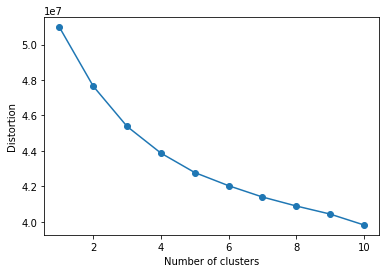

In [28]:
plot_distortion(train_cluster,max_clusters=10)

In [25]:
# airport arr

train_cluster.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'month_avg_arr_delay',
       'month_avg_air_time', 'month_avg_carrier_delay',
       'month_avg_weather_delay', 'month_avg_nas_delay',
       'month_avg_security_delay', 'month_avg_late_aircraft_delay',
       'day_of_week_avg_arr_delay', 'day_of_week_avg_air_time',
       'day_of_week_avg_carrier_delay', 'day_of_week_avg_weather_delay',
       'day_of_week_avg_nas_delay', 'day_of_week_avg_security_delay',
       'day_of_week_avg_late_aircraft_delay', 'arr_hour_avg_arr_delay',
       'arr_hour_avg_air_time', 'arr_hour_avg_carrier_delay',
       'arr_hour_avg_weather_delay', 'arr_hour_avg_nas_delay',
       'arr_hour_avg_security_delay', 'arr_hour_avg_late_aircraft_delay',
       'origin_total_flights', 'dest_total_flights',
       'month_flight_avg_passengers', 'carrier_month_

In [26]:
from sklearn.decomposition import PCA
import plotly.express as px

In [27]:
n_components = 40

pca = PCA(n_components=n_components)
components = pca.fit_transform(train_cluster)

total_var = pca.explained_variance_ratio_.sum() * 100

print("Total Explained Variance: ", total_var)
# labels = {str(i): f"PC {i+1}" for i in range(n_components)}
# labels['color'] = 'Median Price'

# fig = px.scatter_matrix(
#     components,
#     #color=boston.target,
#     dimensions=range(n_components),
#     labels=labels,
#     title=f'Total Explained Variance: {total_var:.2f}%',
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

Total Explained Variance:  89.79044276600476


In [28]:
components.shape

(386992, 40)

# Models

## Random Forest
Cleaned Data Frame

In [28]:
# Split dataset into tlraining set and test set
X_train, X_test, y_train, y_test = train_test_split(train_cleaned, y, test_size=0.2)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target variable  shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (464390, 69)
Test features shape: (116098, 69)
Train target variable  shape: (464390,)
Test target shape: (116098,)


In [21]:
# Random forest cleaned data
model_dict = randforest_reg(X_train, y_train, n_estimators=100, criterion='mse', max_depth=None, n_jobs=-1)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [22]:
regmodel_evaluation(model_dict, X_test, y_test)


RandomForest_Reg metrics:
	R2 = 0.05580288678940104
	Adjusted R2 = 0.05524138783387711
	RMSE = 48.2024131372196

*******************************************************************



In [29]:
X_train.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'month_avg_arr_delay',
       'month_avg_air_time', 'month_avg_carrier_delay',
       'month_avg_weather_delay', 'month_avg_nas_delay',
       'month_avg_security_delay', 'month_avg_late_aircraft_delay',
       'day_of_week_avg_arr_delay', 'day_of_week_avg_air_time',
       'day_of_week_avg_carrier_delay', 'day_of_week_avg_weather_delay',
       'day_of_week_avg_nas_delay', 'day_of_week_avg_security_delay',
       'day_of_week_avg_late_aircraft_delay', 'arr_hour_avg_arr_delay',
       'arr_hour_avg_air_time', 'arr_hour_avg_carrier_delay',
       'arr_hour_avg_weather_delay', 'arr_hour_avg_nas_delay',
       'arr_hour_avg_security_delay', 'arr_hour_avg_late_aircraft_delay',
       'origin_total_flights', 'dest_total_flights',
       'month_flight_avg_passengers', 'carrier_month_

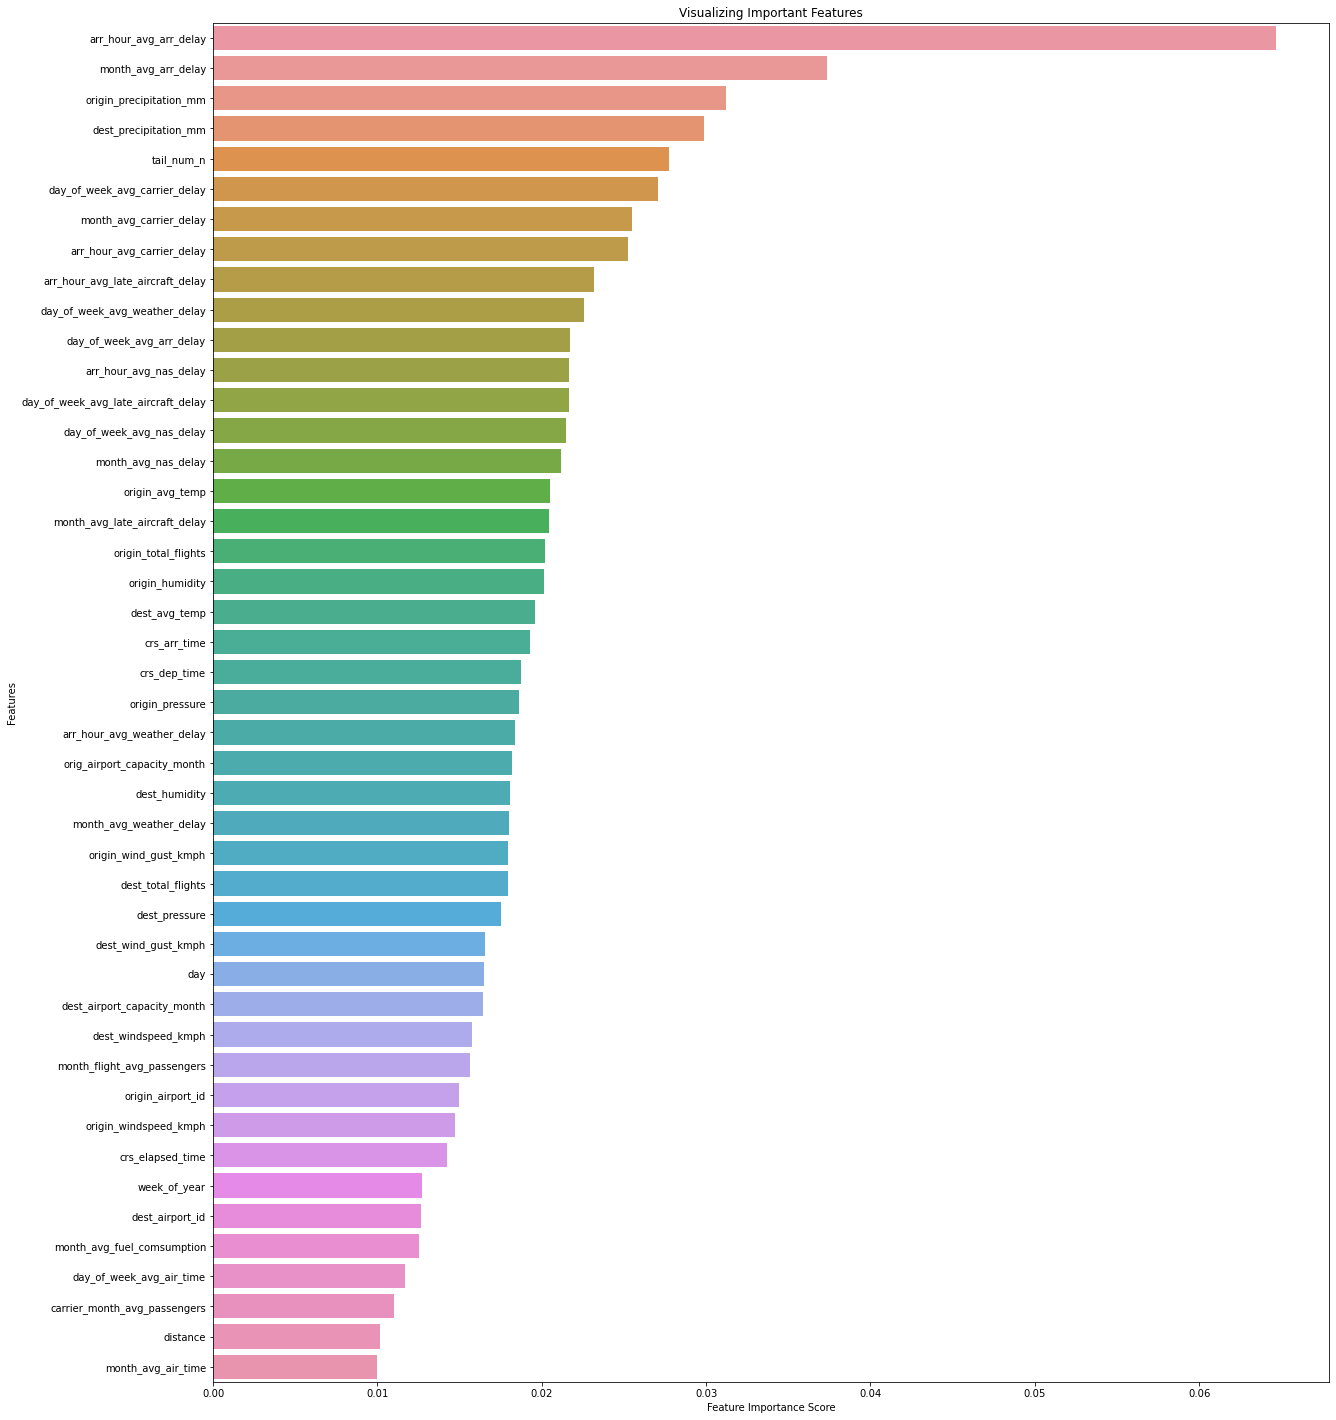

In [31]:
ensemble_feature_importance(model_dict['RandomForest_Reg'],X_train)

#### PCA components

In [32]:
# Split dataset into tlraining set and test set
X_train, X_test, y_train, y_test = train_test_split(components, y, test_size=0.2)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target variable  shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (309593, 40)
Test features shape: (77399, 40)
Train target variable  shape: (309593,)
Test target shape: (77399,)


In [33]:
%time
# Random forest cleaned data
model_dict = randforest_reg(X_train, y_train, n_estimators=100, criterion='mse', max_depth=None, n_jobs=-1)

In [34]:
regmodel_evaluation(model_dict, X_test, y_test)

RandomForest_Reg metrics:
	R2 = 0.033063920983102846
	Adjusted R2 = 0.03256394110822669
	RMSE = 47.74871252353988

*******************************************************************



In [19]:
ensemble_feature_importance(model_dict['RandomForest_Reg'],X_train)

NameError: name 'model_dict' is not defined

In [38]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [40]:
type(model_dict)

dict

In [45]:
model_dict

{'RandomForest_Reg': RandomForestRegressor(n_jobs=-1)}

In [42]:
model_dict.keys()

dict_keys(['RandomForest_Reg'])

In [43]:
model_dict['RandomForest_Reg']

RandomForestRegressor(n_jobs=-1)

#### Random forest less features

In [40]:
#['arr_hour_avg_arr_delay', 'month_avg_arr_delay', 'origin_precipitation_mm', 'dest_precipitation_mm', 'tail_num_n', 'day_of_week_avg_carrier_delay', 'month_avg_carrier_delay', 'arr_hour_avg_carrier_delay', 'arr_hour_avg_late_aircraft_delay', 'day_of_week_avg_weather_delay', 'day_of_week_avg_arr_delay', 'arr_our_avg_nas_delay', 'day_of_week_avg_late_aircraft_delay', 'day_of_week_avg_nas_delay', 'month_avg_nas_delay', 'origin_avg_temp', 'month_avg_late_aircraft_delay', 'origin_total_flights', 'origin_humidity', 'dest_avg_temp', 'crs_arrtime', 'crs_dep_time', 'origin_presure', 'arr_hour_avg_weather_delay', 'dest_humidity']
features = ['arr_hour_avg_arr_delay', 'month_avg_arr_delay', 'origin_precipitation_mm', 'dest_precipitation_mm', \
 'tail_num_n', 'day_of_week_avg_carrier_delay', 'month_avg_carrier_delay', 'arr_hour_avg_carrier_delay', \
 'arr_hour_avg_late_aircraft_delay', 'day_of_week_avg_weather_delay', 'day_of_week_avg_arr_delay', 'arr_hour_avg_nas_delay', \
 'day_of_week_avg_late_aircraft_delay', 'day_of_week_avg_nas_delay', 'month_avg_nas_delay', 'origin_avg_temp']
 
# Split dataset into tlraining set and test set
X_train, X_test, y_train, y_test = train_test_split(train_cleaned[features], y, test_size=0.2)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target variable  shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (309593, 16)
Test features shape: (77399, 16)
Train target variable  shape: (309593,)
Test target shape: (77399,)


In [41]:
# Random forest cleaned data
model_dict = randforest_reg(X_train, y_train, n_estimators=100, criterion='mse', max_depth=None, n_jobs=-1)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [42]:
regmodel_evaluation(model_dict, X_test, y_test)

RandomForest_Reg metrics:
	R2 = 0.03999235535392098
	Adjusted R2 = 0.03979385799905388
	RMSE = 50.50444498309092

*******************************************************************



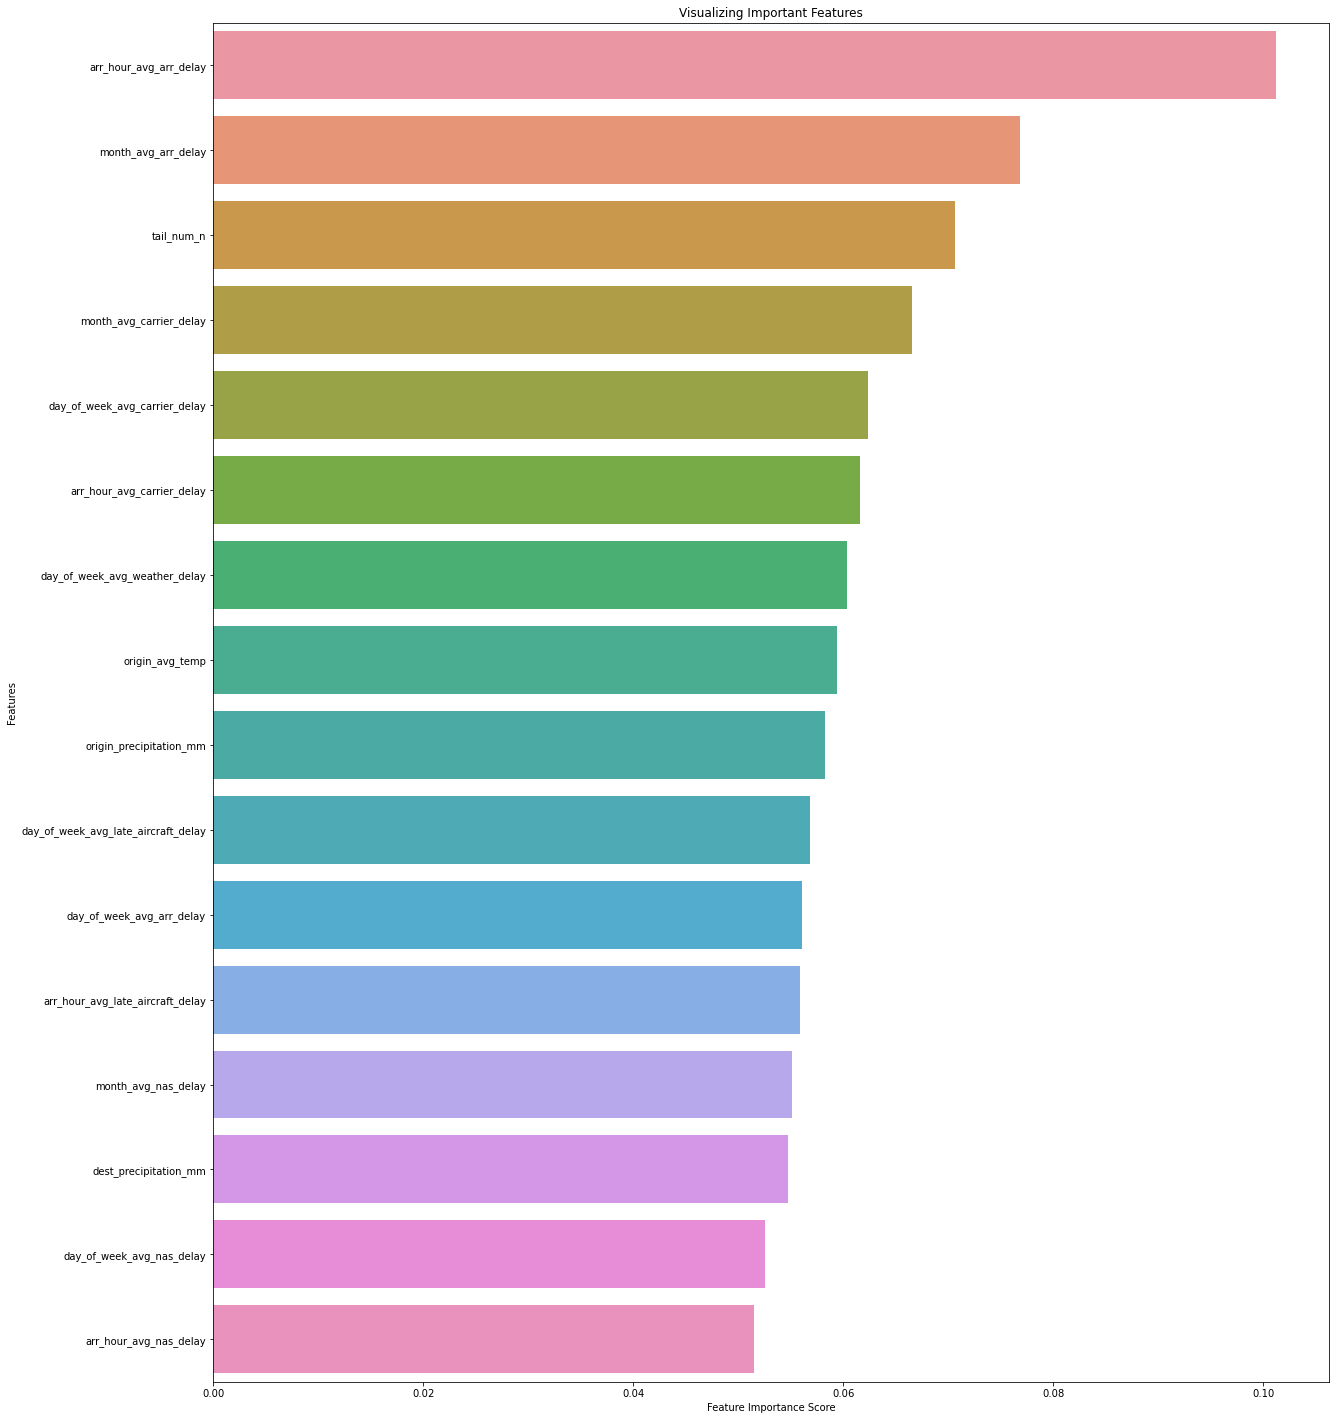

In [43]:
ensemble_feature_importance(model_dict['RandomForest_Reg'],X_train)

# XGBoost

In [25]:
# Features
features = ['arr_hour_avg_arr_delay', 'month_avg_arr_delay', 'origin_precipitation_mm', 'dest_precipitation_mm', \
            'tail_num_n', 'day_of_week_avg_carrier_delay', 'month_avg_carrier_delay', 'arr_hour_avg_carrier_delay', \
            'arr_hour_avg_late_aircraft_delay', 'day_of_week_avg_weather_delay', 'day_of_week_avg_arr_delay', \
            'arr_our_avg_nas_delay', 'day_of_week_avg_late_aircraft_delay', 'day_of_week_avg_nas_delay', 'month_avg_nas_delay', \
            'origin_avg_temp', 'month_avg_late_aircraft_delay', 'origin_total_flights', 'origin_humidity', 'dest_avg_temp', \
            'crs_arrtime', 'crs_dep_time', 'origin_presure', 'arr_hour_avg_weather_delay', 'dest_humidity']


In [27]:
# Split dataset into tlraining set and test set
X_train, X_test, y_train, y_test = train_test_split(train_cleaned, y, test_size=0.2)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target variable  shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (464390, 69)
Test features shape: (116098, 69)
Train target variable  shape: (464390,)
Test target shape: (116098,)


In [28]:
#xgb = xgboost_reg(X_train, y_train, n_estimators=100, max_depth=6, learning_rate=0.1, gamma=100, reg_lambda=2, reg_alpha=.01) - R2 = 0.10017632149422218
#xgb = xgboost_reg(X_train, y_train, n_estimators=100, max_depth=6, learning_rate=0.1, gamma=100, reg_lambda=2, reg_alpha=.1) - R2 = 0.10017666677511161
# xgb = xgboost_reg(X_train, y_train, n_estimators=100, max_depth=6, learning_rate=0.1, gamma=100, reg_lambda=2.5, reg_alpha=.1) - R2 = 0.10186784159568085
# xgb = xgboost_reg(X_train, y_train, n_estimators=500, max_depth=6, learning_rate=0.1, gamma=100, reg_lambda=2.5, reg_alpha=.1) #- R2 = 0.10432143691054208
xgb = xgboost_reg(X_train, y_train, n_estimators=500, max_depth=6, learning_rate=0.1, gamma=100, reg_lambda=2.5, reg_alpha=.1)
%time

CPU times: user 4 µs, sys: 6 µs, total: 10 µs
Wall time: 11.9 µs


In [29]:
regmodel_evaluation(xgb, X_test, y_test)

XGBoost_Reg metrics:
	R2 = 0.11219708974012643
	Adjusted R2 = 0.1116691275171463
	RMSE = 46.50716079129496

*******************************************************************



In [35]:
y_test.describe()# look at std and mean and compare it with RSME

count    116098.000000
mean          5.150916
std          47.875017
min         -69.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1768.000000
Name: arr_delay, dtype: float64

In [36]:
y_pred = xgb['XGBoost_Reg'].predict(X_test)

In [38]:
y_pred

array([ 2.3238456, -9.824    ,  2.0786138, ..., 16.464434 , -4.4068565,
       15.668072 ], dtype=float32)

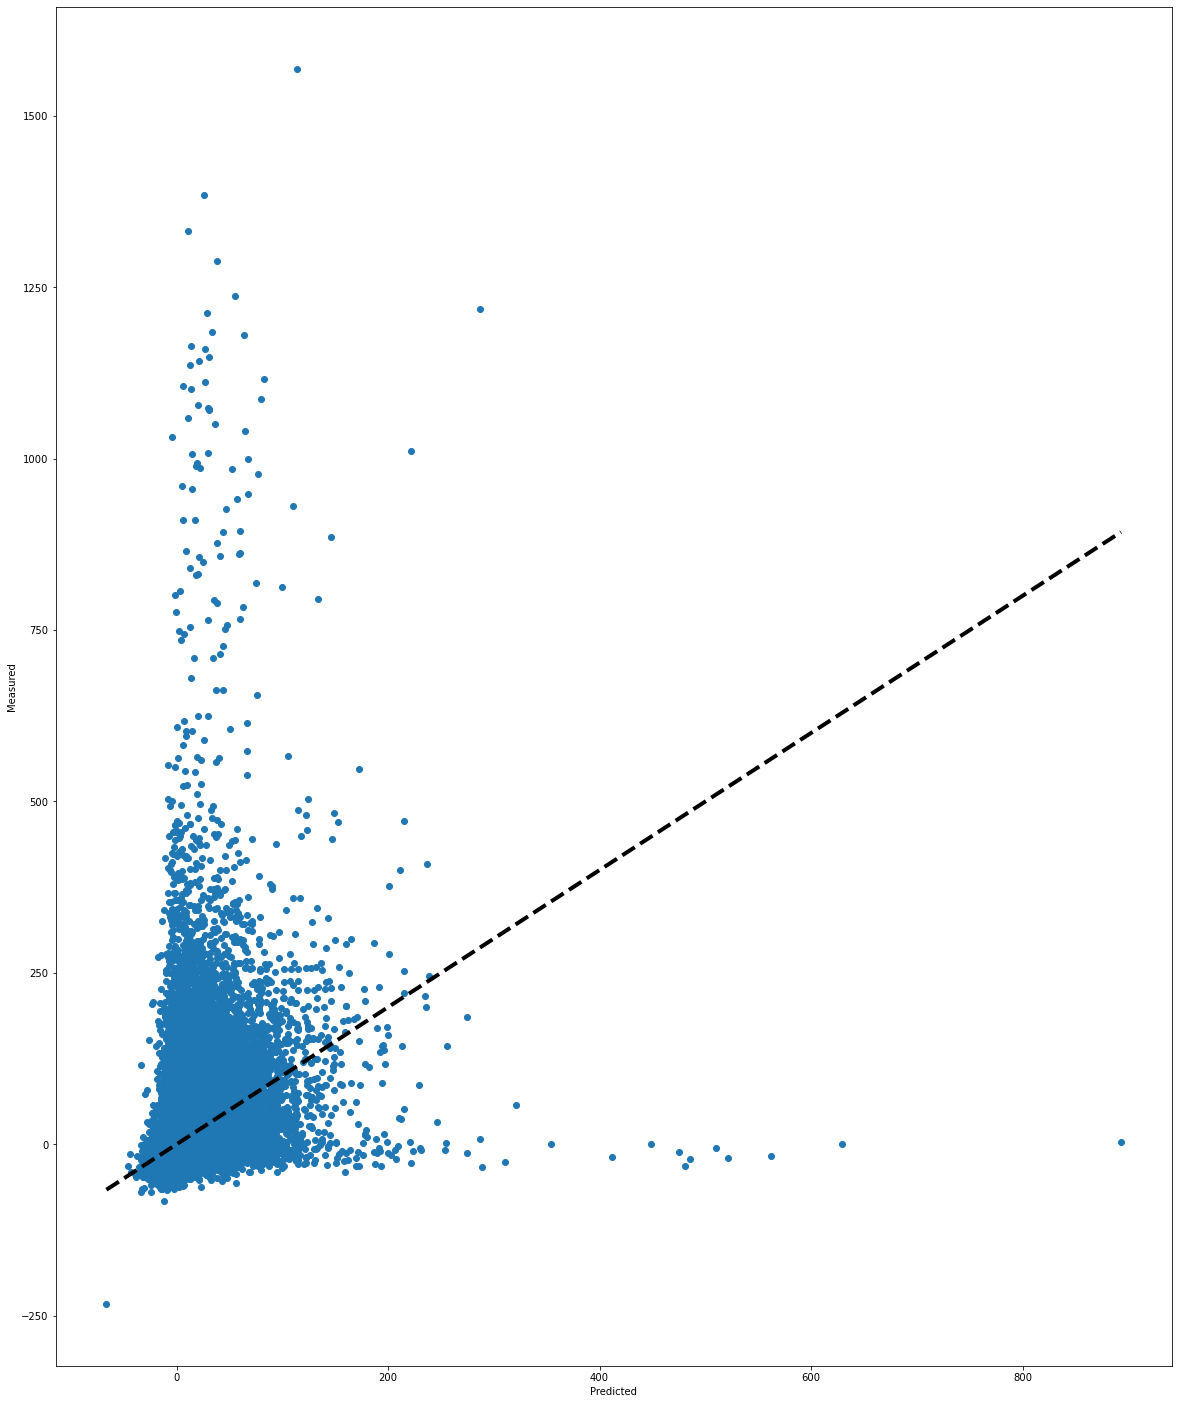

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Measured')
plt.show()

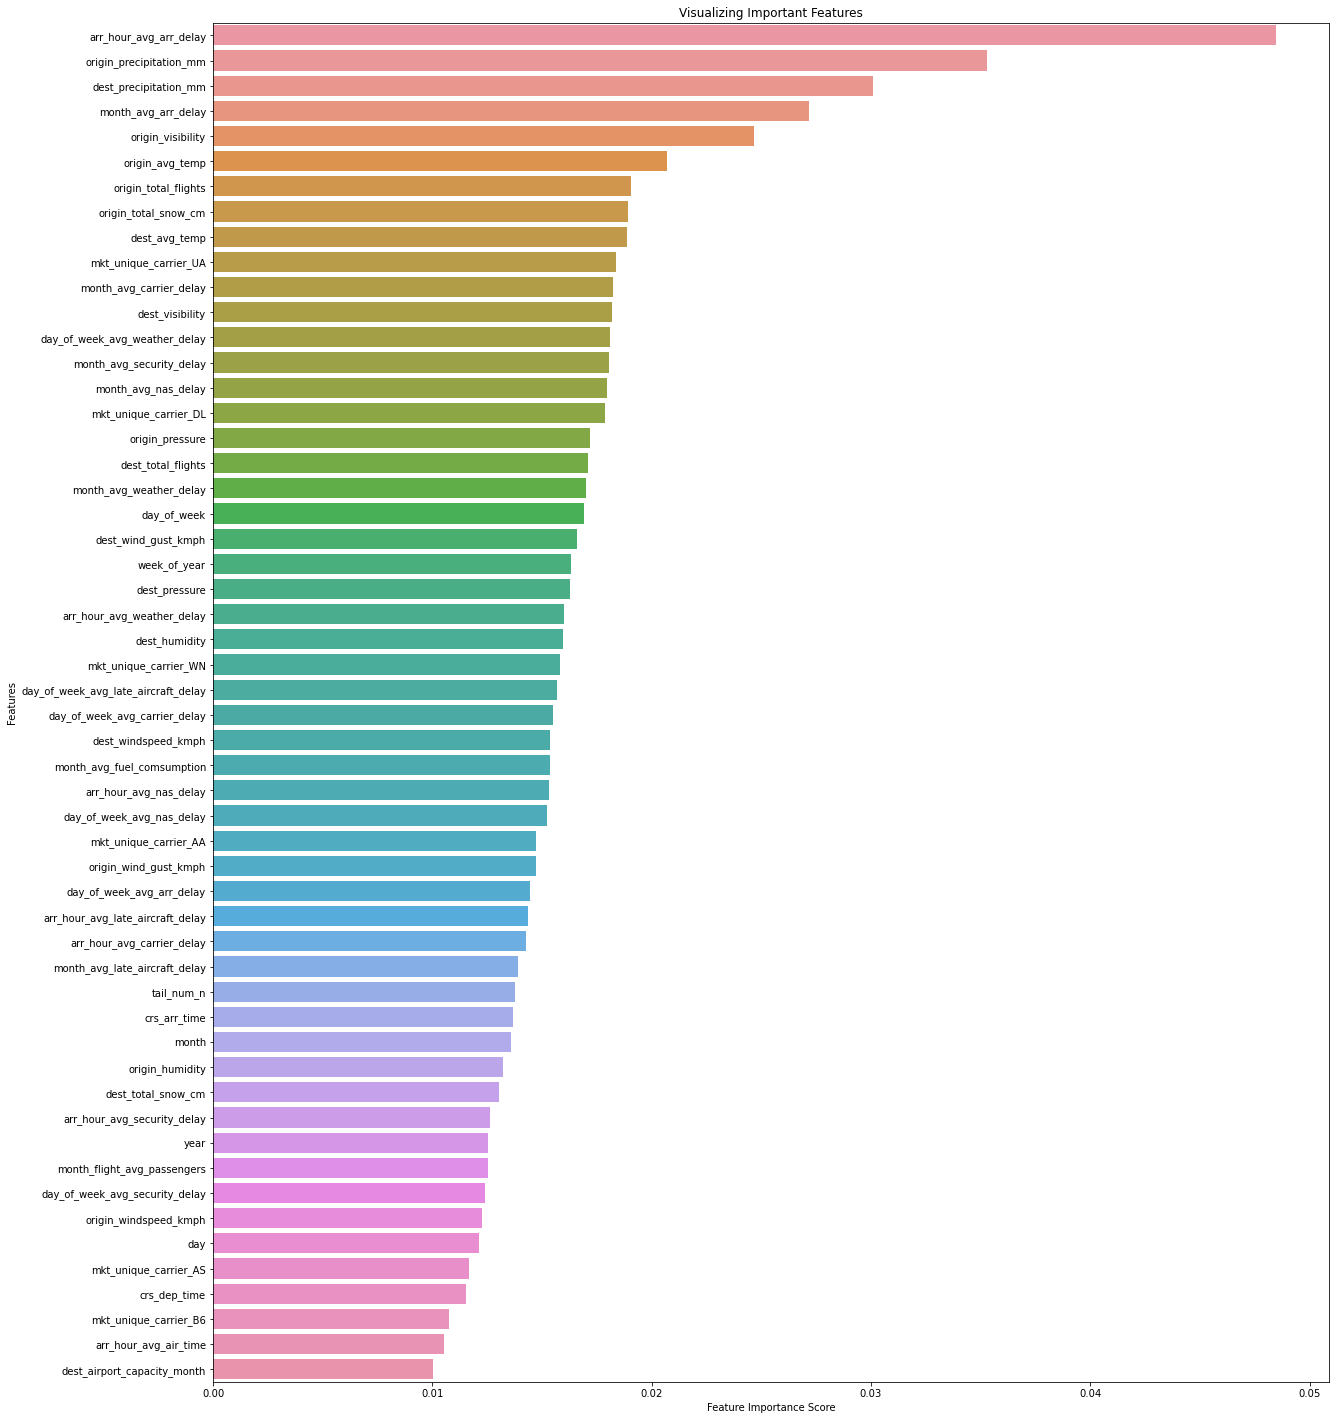

In [39]:
ensemble_feature_importance(xgb['XGBoost_Reg'],X_train)

## Pickling

In [90]:
import pickle

In [91]:
# save the model to disk
filename = 'output/XGboost_model_20200702.pickle'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

# Test - feature engineering

In [92]:
test.shape

(150623, 59)

In [51]:
test = pd.read_csv('data/Test/test.csv')
test.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure
0,WN,5888,N951WN,5888,13891,ONT,14771,SFO,1810,1945,95,363,2020,1,1,3,1,18,19,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,5.258824,56.623529,18.421053,0.0,25.368421,0.0,26.473684,7086.0,57334.0,152.074203,113.048765,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,24365383.0,18967854.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,11.0,14.0,13.0,0.0,12.0,0.0,83.0,10.0,29.0,13.0,12.0,17.0,12.0,Partly cloudy,1021.0
1,WN,6276,N467WN,6276,13891,ONT,14771,SFO,1150,1320,90,363,2020,1,1,3,1,11,13,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,21.142857,59.142857,0.000000,0.0,17.500000,0.0,77.000000,7086.0,57334.0,152.074203,113.048765,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,24365383.0,18967854.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,11.0,14.0,13.0,0.0,12.0,0.0,83.0,10.0,29.0,13.0,12.0,17.0,12.0,Partly cloudy,1021.0
2,WN,4598,N7885A,4598,13891,ONT,14831,SJC,2020,2130,70,333,2020,1,1,3,1,20,21,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,8.811881,51.735974,7.871429,0.0,2.728571,0.0,47.800000,7086.0,20962.0,155.201183,98.481989,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,6173045.0,4355999.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,8.0,16.0,12.0,0.0,6.0,0.0,71.0,10.0,44.0,11.0,11.0,8.0,11.0,Overcast,1021.0
3,WN,4761,N551WN,4761,13891,ONT,14831,SJC,1340,1455,75,333,2020,1,1,3,1,13,14,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,2.074074,51.700000,15.717391,0.0,2.239130,0.0,21.956522,7086.0,20962.0,155.201183,98.481989,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,6173045.0,4355999.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,8.0,16.0,12.0,0.0,6.0,0.0,71.0,10.0,44.0,11.0,11.0,8.0,11.0,Overcast,1021.0
4,WN,5162,N968WN,5162,13891,ONT,14831,SJC,915,1035,80,333,2020,1,1,3,1,9,10,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,

In [56]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
origin_weather_description,6155,0.040864
dest_weather_description,6148,0.040817
dest_airport_capacity_month,0,0.000000
day_of_week_avg_weather_delay,0,0.000000
month_avg_weather_delay,0,0.000000
month_avg_nas_delay,0,0.000000
month_avg_security_delay,0,0.000000
month_avg_late_aircraft_delay,0,0.000000
day_of_week_avg_arr_delay,0,0.000000
day_of_week_avg_air_time,0,0.000000


In [53]:
test['orig_airport_capacity_month'] = test['orig_airport_month_passengers'] / test['orig_airport_month_flight_seats']
test['dest_airport_capacity_month'] = test['dest_airport_month_passengers'] / test['dest_airport_month_flight_seats']
test.shape

(150623, 85)

In [54]:

test.shape

(150623, 85)

In [55]:
test['tail_num'] = test['tail_num'].fillna('empty')

In [59]:
test.head()

,mkt_unique_carrier,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,origin_min_temp,origin_max_temp,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_cloud_cover,origin_heat_index_c,origin_wind_chill_c,origin_wind_gust_kmph,origin_feels_like,origin_weather_description,origin_pressure,dest_min_temp,dest_max_temp,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_cloud_cover,dest_heat_index_c,dest_wind_chill_c,dest_wind_gust_kmph,dest_feels_like,dest_weather_description,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n
0,WN,5888,N951WN,5888,13891,ONT,14771,SFO,1810,1945,95,363,2020,1,1,3,1,18,19,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,5.258824,56.623529,18.421053,0.0,25.368421,0.0,26.473684,7086.0,57334.0,152.074203,113.048765,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,24365383.0,18967854.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,11.0,14.0,13.0,0.0,12.0,0.0,83.0,10.0,29.0,13.0,12.0,17.0,12.0,Partly cloudy,1021.0,0.75588,0.778476,789518778
1,WN,6276,N467WN,6276,13891,ONT,14771,SFO,1150,1320,90,363,2020,1,1,3,1,11,13,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,21.142857,59.142857,0.000000,0.0,17.500000,0.0,77.000000,7086.0,57334.0,152.074203,113.048765,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,24365383.0,18967854.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,11.0,14.0,13.0,0.0,12.0,0.0,83.0,10.0,29.0,13.0,12.0,17.0,12.0,Partly cloudy,1021.0,0.75588,0.778476,784678778
2,WN,4598,N7885A,4598,13891,ONT,14831,SJC,2020,2130,70,333,2020,1,1,3,1,20,21,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,8.811881,51.735974,7.871429,0.0,2.728571,0.0,47.800000,7086.0,20962.0,155.201183,98.481989,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,6173045.0,4355999.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,8.0,16.0,12.0,0.0,6.0,0.0,71.0,10.0,44.0,11.0,11.0,8.0,11.0,Overcast,1021.0,0.75588,0.705648,78788565
3,WN,4761,N551WN,4761,13891,ONT,14831,SJC,1340,1455,75,333,2020,1,1,3,1,13,14,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,2.074074,51.700000,15.717391,0.0,2.239130,0.0,21.956522,7086.0,20962.0,155.201183,98.481989,79269676,58102809,154.052359,113.739038,156532592.0,2303449.0,1741130.0,6173045.0,4355999.0,10.0,18.0,15.0,0.0,4.0,0.0,34.0,10.0,5.0,14.0,14.0,7.0,14.0,Partly cloudy,1017.0,8.0,16.0,12.0,0.0,6.0,0.0,71.0,10.0,44.0,11.0,11.0,8.0,11.0,Overcast,1021.0,0.75588,0.705648,78

In [58]:
# Transform tail_num to numeric
test['tail_num_n'] = test['tail_num'].apply(lambda x: get_ord_digit(x))

In [60]:
to_drop = ['origin', 'dest', 'mkt_carrier_fl_num', 'op_carrier_fl_num', 'month_flight_avg_seats', 'carrier_month_seats', 'carrier_month_passengers', \
          'carrier_month_avg_seats', 'orig_airport_month_passengers', 'orig_airport_month_flight_seats', 'dest_airport_month_passengers', \
           'dest_airport_month_flight_seats', 'origin_feels_like', 'origin_min_temp', 'origin_max_temp', 'origin_cloud_cover', 'origin_heat_index_c', \
           'origin_wind_chill_c','origin_weather_description', 'dest_feels_like', 'dest_min_temp', 'dest_max_temp', 'dest_cloud_cover', 'dest_heat_index_c', \
           'dest_wind_chill_c', 'dest_weather_description', 'tail_num']
test = test.drop(to_drop, axis=1)
test.shape

(150623, 59)

In [63]:
test.dtypes[test.dtypes == 'object']

mkt_unique_carrier    object
dtype: object

In [64]:
test.head()

,mkt_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n
0,WN,13891,14771,1810,1945,95,363,2020,1,1,3,1,18,19,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,5.258824,56.623529,18.421053,0.0,25.368421,0.0,26.473684,7086.0,57334.0,113.048765,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,13.0,0.0,12.0,0.0,83.0,10.0,17.0,1021.0,0.75588,0.778476,789518778
1,WN,13891,14771,1150,1320,90,363,2020,1,1,3,1,11,13,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,21.142857,59.142857,0.000000,0.0,17.500000,0.0,77.000000,7086.0,57334.0,113.048765,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,13.0,0.0,12.0,0.0,83.0,10.0,17.0,1021.0,0.75588,0.778476,784678778
2,WN,13891,14831,2020,2130,70,333,2020,1,1,3,1,20,21,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,8.811881,51.735974,7.871429,0.0,2.728571,0.0,47.800000,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,78788565
3,WN,13891,14831,1340,1455,75,333,2020,1,1,3,1,13,14,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,2.074074,51.700000,15.717391,0.0,2.239130,0.0,21.956522,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,785518778
4,WN,13891,14831,915,1035,80,333,2020,1,1,3,1,9,10,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,-2.740260,52.000000,75.000000,0.0,17.833333,0.0,13.000000,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,789688778


In [65]:
test.shape

(150623, 59)

In [66]:
cat_feats = test.dtypes[test.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(test[cat_feats])
df_dummy
test_cleaned = pd.concat([test, df_dummy], axis=1)
test_cleaned = test_cleaned.drop(['mkt_unique_carrier'], axis=1)
test_cleaned.shape

(150623, 68)

In [67]:
test_cleaned.head()

,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN
0,13891,14771,1810,1945,95,363,2020,1,1,3,1,18,19,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,5.258824,56.623529,18.421053,0.0,25.368421,0.0,26.473684,7086.0,57334.0,113.048765,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,13.0,0.0,12.0,0.0,83.0,10.0,17.0,1021.0,0.75588,0.778476,789518778,0,0,0,0,0,0,0,0,0,1
1,13891,14771,1150,1320,90,363,2020,1,1,3,1,11,13,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.125000,57.125000,1.478261,0.00,42.521739,0.0,9.956522,21.142857,59.142857,0.000000,0.0,17.500000,0.0,77.000000,7086.0,57334.0,113.048765,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,13.0,0.0,12.0,0.0,83.0,10.0,17.0,1021.0,0.75588,0.778476,784678778,0,0,0,0,0,0,0,0,0,1
2,13891,14831,2020,2130,70,333,2020,1,1,3,1,20,21,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,8.811881,51.735974,7.871429,0.0,2.728571,0.0,47.800000,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,78788565,0,0,0,0,0,0,0,0,0,1
3,13891,14831,1340,1455,75,333,2020,1,1,3,1,13,14,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,2.074074,51.700000,15.717391,0.0,2.239130,0.0,21.956522,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,785518778,0,0,0,0,0,0,0,0,0,1
4,13891,14831,915,1035,80,333,2020,1,1,3,1,9,10,-0.467742,53.842742,9.846154,0.0,7.128205,1.948718,20.102564,-1.183761,52.297009,9.200000,0.72,3.920000,0.0,33.140000,-2.740260,52.000000,75.000000,0.0,17.833333,0.0,13.000000,7086.0,20962.0,98.481989,113.739038,156532592.0,15.0,0.0,4.0,0.0,34.0,10.0,7.0,1017.0,12.0,0.0,6.0,0.0,71.0,10.0,8.0,1021.0,0.75588,0.705648,789688778,0,0,0,0,0,0,0,0,0,1


In [69]:
# Scaling
scaler = StandardScaler()

test_cleaned = pd.DataFrame(scaler.fit_transform(test_cleaned.astype(float)), columns=test_cleaned.columns)

In [70]:
print(f"Test data set columns: {len(test_cleaned.columns)} and rows {len(test_cleaned.index)}.")
test_cleaned.head()

Train data set columns: 68 and rows 150623.


,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_avg_passengers,carrier_month_avg_passengers,month_avg_fuel_comsumption,origin_avg_temp,origin_total_snow_cm,origin_windspeed_kmph,origin_precipitation_mm,origin_humidity,origin_visibility,origin_wind_gust_kmph,origin_pressure,dest_avg_temp,dest_total_snow_cm,dest_windspeed_kmph,dest_precipitation_mm,dest_humidity,dest_visibility,dest_wind_gust_kmph,dest_pressure,orig_airport_capacity_month,dest_airport_capacity_month,tail_num_n,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN
0,0.78151,1.359594,0.963882,0.876848,-0.660447,-0.717995,0.0,0.0,-1.528764,0.022398,-0.638796,1.002153,0.847341,-0.407247,-1.491645,-1.151244,-0.446521,-1.10933,-0.103027,-1.517865,-0.283842,-0.757808,-1.177243,-0.515554,2.439603,-0.140369,-1.128269,-0.011252,-0.750790,-0.172918,-0.407892,0.708671,-0.134473,0.107054,-1.041543,0.355951,-6.890758e-14,-0.578069,0.618029,0.865879,-0.142856,-1.317428,-0.35558,-1.339583,0.442484,-1.229544,0.206412,0.596879,-0.14268,-0.095306,-0.355458,1.024962,0.442559,-0.167188,0.226159,-0.000341,0.417302,-0.028654,-0.600944,-0.246486,-0.19605,-0.501487,-0.142361,-0.120308,-0.11044,-0.167257,-0.499496,2.238467
1,0.78151,1.359594,-0.372765,-0.315885,-0.728836,-0.717995,0.0,0.0,-1.528764,0.022398,-0.638796,-0.420511,-0.298153,-0.407247,-1.491645,-1.151244,-0.446521,-1.10933,-0.103027,-1.517865,-0.283842,-0.757808,-1.177243,-0.515554,2.439603,-0.140369,-1.128269,1.370303,-0.715039,-0.942015,-0.407892,0.186810,-0.134473,2.639065,-1.041543,0.355951,-6.890758e-14,-0.578069,0.618029,0.865879,-0.142856,-1.317428,-0.35558,-1.339583,0.442484,-1.229544,0.206412,0.596879,-0.14268,-0.095306,-0.355458,1.024962,0.442559,-0.167188,0.226159,-0.000341,0.417302,-0.028656,-0.600944,-0.246486,-0.19605,-0.501487,-0.142361,-0.120308,-0.11044,-0.167257,-0.499496,2.238467
2,0.78151,1.398996,1.389179,1.229897,-1.002392,-0.768505,0.0,0.0,-1.528764,0.022398,-0.638796,1.408629,1.229172,-0.455558,-0.744025,-0.591227,-0.446521,-0.55462,2.174326,-0.261819,-0.802586,-0.826856,-0.709641,-0.416913,-0.971386,-0.140369,0.444889,0.297785,-0.820147,-0.613375,-0.407892,-0.792880,-0.134473,1.175774,-1.041543,-0.655865,-5.351017e-01,-0.578069,0.618029,0.865879,-0.142856,-1.317428,-0.35558,-1.339583,0.442484,-1.229544,0.206412,0.461947,-0.14268,-1.012454,-0.355458,0.445747,0.442559,-1.124024,0.226159,-0.000341,-0.927852,-0.028899,-0.600944,-0.246486,-0.19605,-0.501487,-0.142361,-0.120308,-0.11044,-0.167257,-0.499496,2.238467
3,0.78151,1.398996,0.012027,-0.058255,-0.934003,-0.768505,0.0,0.0,-1.528764,0.022398,-0.638796,-0.014036,-0.107237,-0.455558,-0.744025,-0.591227,-0.446521,-0.55462,2.174326,-0.261819,-0.802586,-0.826856,-0.709641,-0.416913,-0.971386,-0.140369,0.444889,-0.288254,-0.820658,-0.285798,-0.407892,-0.825342,-0.134473,-0.119313,-1.041543,-0.655865,-5.351017e-01,-0.578069,0.618029,0.865879,-0.142856,-1.317428,-0.35558,-1.339583,0.442484,-1.229544,0.206412,0.461947,-0.14268,-1.012454,-0.355458,0.445747,0.442559,-1.124024,0.226159,-0.000341,-0.927852,-0.028655,-0.600944,-0.246486,-0.19605,-0.501487,-0.142361,-0.120308,-0.11044,-0.167257,-0.499496,2.23

In [71]:
total = test_cleaned.isnull().sum().sort_values(ascending=False)
percent = (test_cleaned.isnull().sum()/test_cleaned.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
mkt_unique_carrier_WN,0,0.0
day_of_week_avg_nas_delay,0,0.0
month_avg_security_delay,0,0.0
month_avg_late_aircraft_delay,0,0.0
day_of_week_avg_arr_delay,0,0.0
day_of_week_avg_air_time,0,0.0
day_of_week_avg_carrier_delay,0,0.0
day_of_week_avg_weather_delay,0,0.0
day_of_week_avg_security_delay,0,0.0
mkt_unique_carrier_UA,0,0.0


In [75]:
# Added mkt_unique_carrier_VX column. This is because train model had it and is needed to predict values.
test_cleaned['mkt_unique_carrier_VX'] = 0

In [80]:
test_cleaned = test_cleaned[['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'month_avg_arr_delay',
       'month_avg_air_time', 'month_avg_carrier_delay',
       'month_avg_weather_delay', 'month_avg_nas_delay',
       'month_avg_security_delay', 'month_avg_late_aircraft_delay',
       'day_of_week_avg_arr_delay', 'day_of_week_avg_air_time',
       'day_of_week_avg_carrier_delay', 'day_of_week_avg_weather_delay',
       'day_of_week_avg_nas_delay', 'day_of_week_avg_security_delay',
       'day_of_week_avg_late_aircraft_delay', 'arr_hour_avg_arr_delay',
       'arr_hour_avg_air_time', 'arr_hour_avg_carrier_delay',
       'arr_hour_avg_weather_delay', 'arr_hour_avg_nas_delay',
       'arr_hour_avg_security_delay', 'arr_hour_avg_late_aircraft_delay',
       'origin_total_flights', 'dest_total_flights',
       'month_flight_avg_passengers', 'carrier_month_avg_passengers',
       'month_avg_fuel_comsumption', 'origin_avg_temp', 'origin_total_snow_cm',
       'origin_windspeed_kmph', 'origin_precipitation_mm', 'origin_humidity',
       'origin_visibility', 'origin_wind_gust_kmph', 'origin_pressure',
       'dest_avg_temp', 'dest_total_snow_cm', 'dest_windspeed_kmph',
       'dest_precipitation_mm', 'dest_humidity', 'dest_visibility',
       'dest_wind_gust_kmph', 'dest_pressure', 'orig_airport_capacity_month',
       'dest_airport_capacity_month', 'tail_num_n', 'mkt_unique_carrier_AA',
       'mkt_unique_carrier_AS', 'mkt_unique_carrier_B6',
       'mkt_unique_carrier_DL', 'mkt_unique_carrier_F9',
       'mkt_unique_carrier_G4', 'mkt_unique_carrier_HA',
       'mkt_unique_carrier_NK', 'mkt_unique_carrier_UA',
       'mkt_unique_carrier_VX', 'mkt_unique_carrier_WN']]

In [104]:
test_cleaned.to_csv('data/Test/test_cleaned_XGboost_model_20200702.csv', index=False)

In [82]:
prediction = xgb['XGBoost_Reg'].predict(test_cleaned)

In [83]:
prediction

array([ 9.75589  ,  7.5752883,  2.0875394, ...,  1.7740542,  1.1591172,
       -6.833372 ], dtype=float32)

In [95]:
prediction.shape

(150623,)

In [74]:
print(test_cleaned.shape)
test_cleaned.columns

(150623, 68)


Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'month_avg_arr_delay',
       'month_avg_air_time', 'month_avg_carrier_delay',
       'month_avg_weather_delay', 'month_avg_nas_delay',
       'month_avg_security_delay', 'month_avg_late_aircraft_delay',
       'day_of_week_avg_arr_delay', 'day_of_week_avg_air_time',
       'day_of_week_avg_carrier_delay', 'day_of_week_avg_weather_delay',
       'day_of_week_avg_nas_delay', 'day_of_week_avg_security_delay',
       'day_of_week_avg_late_aircraft_delay', 'arr_hour_avg_arr_delay',
       'arr_hour_avg_air_time', 'arr_hour_avg_carrier_delay',
       'arr_hour_avg_weather_delay', 'arr_hour_avg_nas_delay',
       'arr_hour_avg_security_delay', 'arr_hour_avg_late_aircraft_delay',
       'origin_total_flights', 'dest_total_flights',
       'month_flight_avg_passengers', 'carrier_month_

In [84]:
np.mean(prediction)

6.5076427

In [86]:
y.describe()

count    580488.000000
mean          5.377031
std          48.868121
min        -233.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1768.000000
Name: arr_delay, dtype: float64

In [87]:
prediction.max()

641.7397

In [88]:
prediction.min()

-41.423725

In [89]:
prediction.std()

20.752468

In [93]:
len(prediction)

150623

In [97]:
# Read test fields to join to predictions
submit_test = pd.read_csv('data/Test/submit_test.csv')
submit_test.shape

(150623, 5)

In [100]:
# Create predictions DataFrame to join with submit_test
predictions = pd.DataFrame(prediction, columns=['predicted_delay'])
predictions.shape

(150623, 1)

In [101]:
submit_final = pd.merge(submit_test, predictions, how='left' , left_index=True, right_index=True)
print(submit_final.shape)
submit_final.head()

(150623, 6)


,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,9.755890
1,2020-01-01,WN,6276,ONT,SFO,7.575288
2,2020-01-01,WN,4598,ONT,SJC,2.087539
3,2020-01-01,WN,4761,ONT,SJC,-1.901955
4,2020-01-01,WN,5162,ONT,SJC,-6.550891


In [102]:
submit_final.to_csv('data/Submission/Flight_Delay_Predictor_XGboost_model_20200702.csv', index=False)